In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sunpy
import sunpy.map
from sunpy.coordinates import (get_earth, get_horizons_coord,
                                Helioprojective, propagate_with_solar_surface)
import sunkit_image
import sunkit_image.coalignment as coalignment
import astropy
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const
import eispac

import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)

from astropy.visualization import (AsinhStretch, LinearStretch,
        LogStretch, ImageNormalize)
import os

In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                  bbox_to_anchor=(1.02, 0., 1, 1),orientation="vertical"):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation=orientation,ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

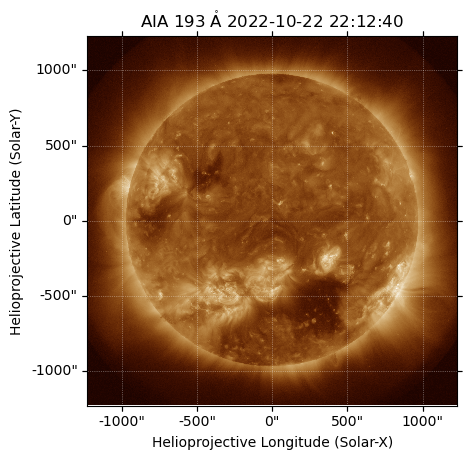

In [3]:
aia_193_map_eis = sunpy.map.Map("../../src/AIA/20221022/193/lvl15/aia_lev15_193a_2022_10_22t22_12_40_84z_image_lev15.fits")
aia_193_map_eis.plot()

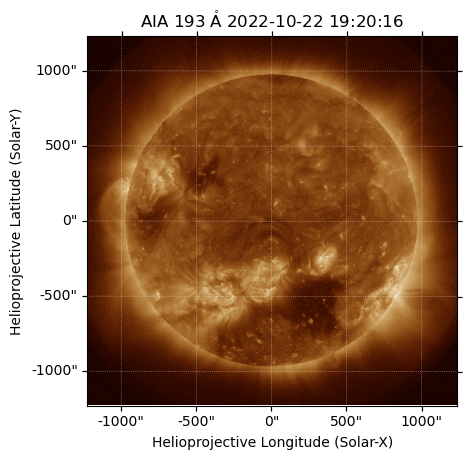

In [4]:
aia_193_map = sunpy.map.Map("../../src/AIA/20221022/193/lvl1/aia_lev1_193a_2022_10_22t19_20_16_83z_image_lev1.fits")
aia_193_map.plot()

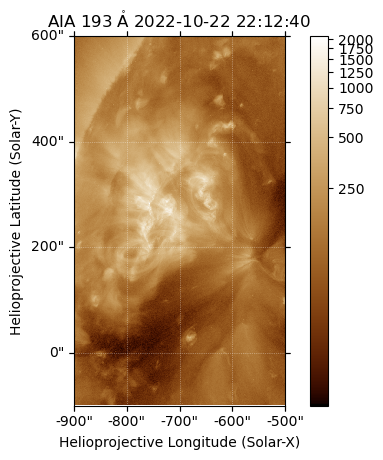

In [5]:
aia_193_map_corp = aia_193_map_eis.submap(SkyCoord(-900*u.arcsec,-100*u.arcsec,frame=aia_193_map_eis.coordinate_frame),
                                        top_right=SkyCoord(-500*u.arcsec,600*u.arcsec,frame=aia_193_map_eis.coordinate_frame))
aia_193_map_corp.plot()
plt.colorbar()

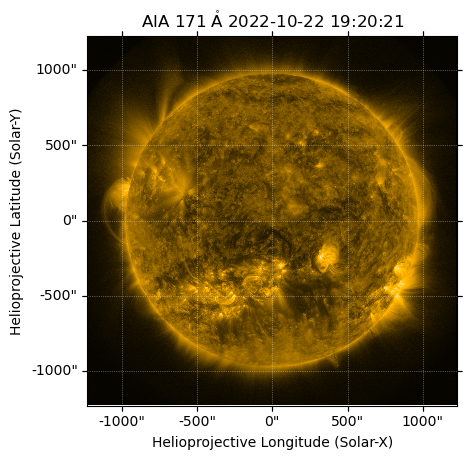

In [6]:
aia_171_map = sunpy.map.Map("../../src/AIA/20221022/171/lvl15/aia_lev15_171a_2022_10_22t19_20_21_34z_image_lev15.fits")
aia_171_map.plot()

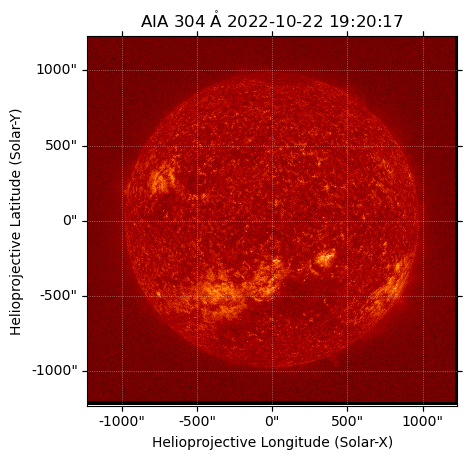

In [7]:
aia_304_map = sunpy.map.Map("../../src/AIA/20221022/304/lvl15/aia_lev15_304a_2022_10_22t19_20_17_13z_image_lev15.fits")
aia_304_map.plot()

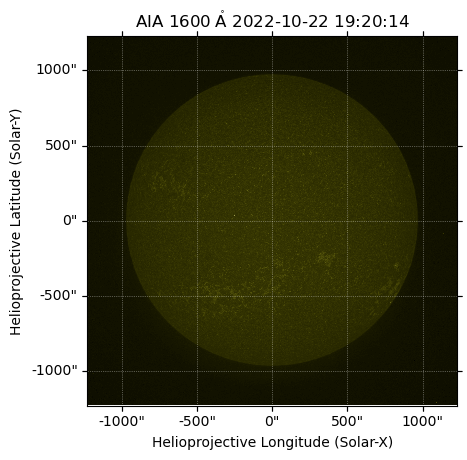

In [8]:
aia_1600_map = sunpy.map.Map("../../src/AIA/20221022/1600/lvl15/aia_lev15_1600a_2022_10_22t19_20_14_13z_image_lev15.fits")
aia_1600_map.plot()

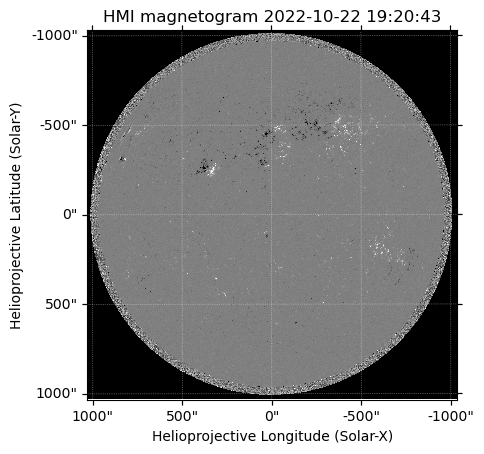

In [9]:
hmi_los_map = sunpy.map.Map("../../src/HMI/20221022/lvl1/hmi.m_45s.2022.10.22_19_21_45_TAI.magnetogram.fits")
hmi_los_map.plot_settings['norm'] = plt.Normalize(-500, 500)
hmi_los_map.plot()

In [10]:
hmi_los_map_to_aia = hmi_los_map.reproject_to(aia_193_map.wcs)

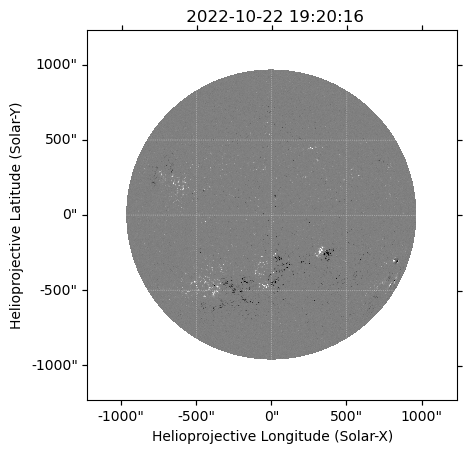

In [11]:
hmi_los_map_to_aia.plot()

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


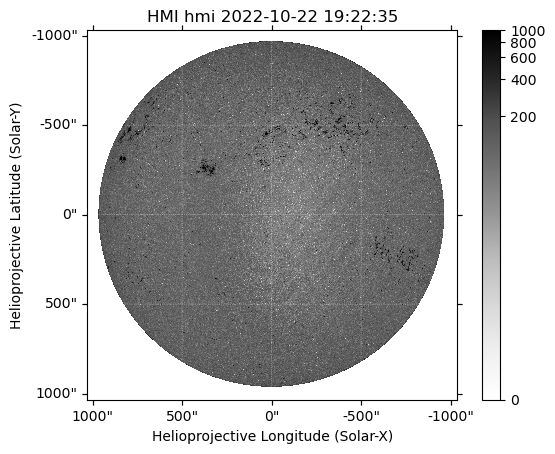

In [12]:
hmi_btot_map = sunpy.map.Map("../../src/HMI/20221022/vectormag/hmi.B_720s.20221022_192400_TAI.field.fits")
hmi_btot_map.plot(norm=ImageNormalize(vmin=0,vmax=1000,stretch=LogStretch()),cmap="Greys")
plt.colorbar()

In [13]:
hmi_btot_map_to_aia = hmi_btot_map.reproject_to(aia_193_map.wcs)

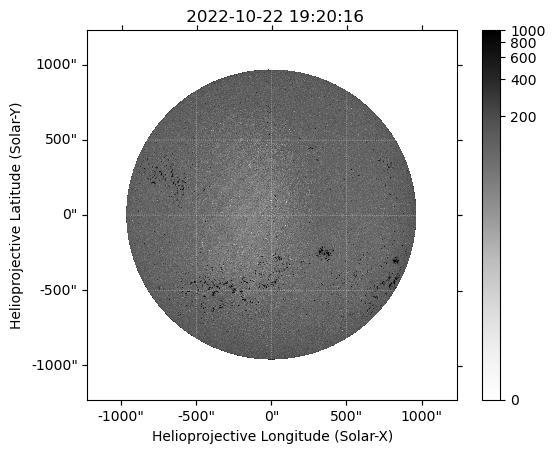

In [14]:
hmi_btot_map_to_aia.plot(norm=ImageNormalize(vmin=0,vmax=1000,stretch=LogStretch()),cmap="Greys")
plt.colorbar()

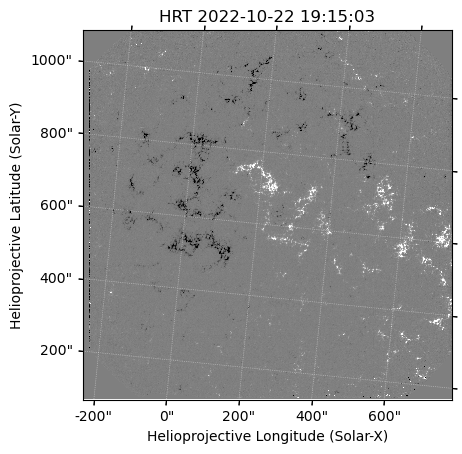

In [15]:
phi_los_map = sunpy.map.Map("../../src/PHI/20221022/solo_L2_phi-hrt-blos_20221022T191503_V01.fits")
phi_los_map.plot_settings['norm'] = plt.Normalize(-500, 500)
phi_los_map.plot()

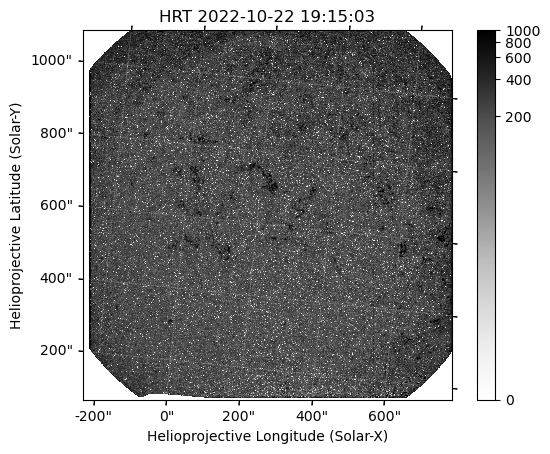

In [16]:
phi_btot_map = sunpy.map.Map("../../src/PHI/20221022/solo_L2_phi-hrt-bmag_20221022T191503_V01.fits")
phi_btot_map.plot(norm=ImageNormalize(vmin=0,vmax=1000,stretch=LogStretch()),cmap="Greys")
plt.colorbar()

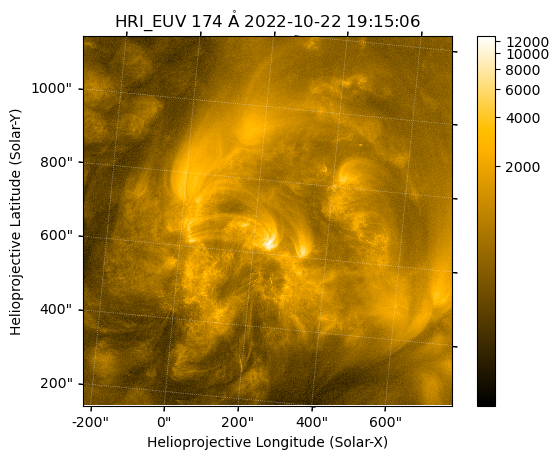

In [18]:
hri_174_map = sunpy.map.Map("../../src/hri/HRI/euv174/20221022/solo_L2_hri-hrieuv174-image_20221022T191505252_V01.fits")
hri_174_map.plot()
plt.colorbar()

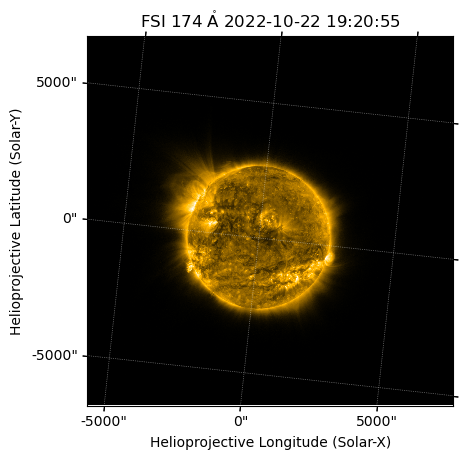

In [17]:
fsi_174_map = sunpy.map.Map("../../src/EUI/FSI/euv174/20221022/solo_L2_eui-fsi174-image_20221022T192050259_V01.fits")
fsi_174_map.plot()

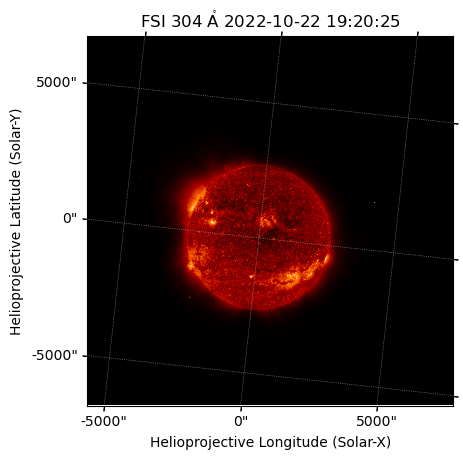

In [18]:
fsi_304_map = sunpy.map.Map("../../src/EUI/FSI/euv304/20221022/solo_L2_eui-fsi304-image_20221022T192020259_V01.fits")
fsi_304_map.plot()

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221022T2140/eis_20221022_214043.fe_12_195_119.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


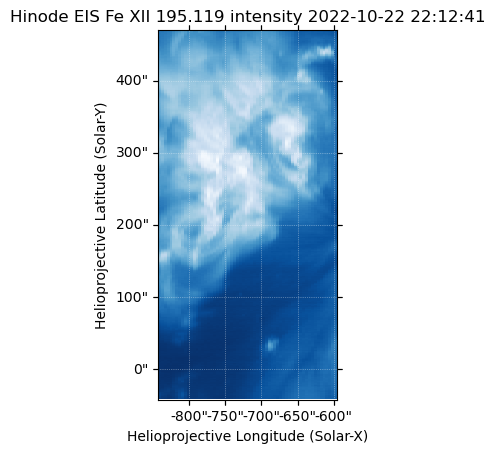

In [19]:
eis_193_fitres = eispac.read_fit("../../src/EIS/DHB_007_v2/20221022T2140/eis_20221022_214043.fe_12_195_119.1c-0.fit.h5")
eis_193_intmap = eis_193_fitres.get_map(component=0,measurement="intensity")
eis_193_intmap.plot()

In [20]:
aia_resample_nx = (aia_193_map_corp.scale.axis1 * aia_193_map_corp.dimensions.x) / eis_193_intmap.scale.axis1
aia_resample_ny = (aia_193_map_corp.scale.axis2 * aia_193_map_corp.dimensions.y) / eis_193_intmap.scale.axis2
aia_193_map_resample = aia_193_map_corp.resample(u.Quantity([aia_resample_nx, aia_resample_ny]))

In [21]:
yshift, xshift = coalignment._calculate_shift(aia_193_map_resample.data, eis_193_intmap.data)

In [22]:
reference_coord = aia_193_map_resample.pixel_to_world(xshift, yshift)
Txshift = reference_coord.Tx - eis_193_intmap.bottom_left_coord.Tx
Tyshift = reference_coord.Ty - eis_193_intmap.bottom_left_coord.Ty
print(Txshift)
print(Tyshift)
eis_193_intmap_shift = eis_193_intmap.shift_reference_coord(Txshift,Tyshift)

3.46629 arcsec
-6.67951 arcsec


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


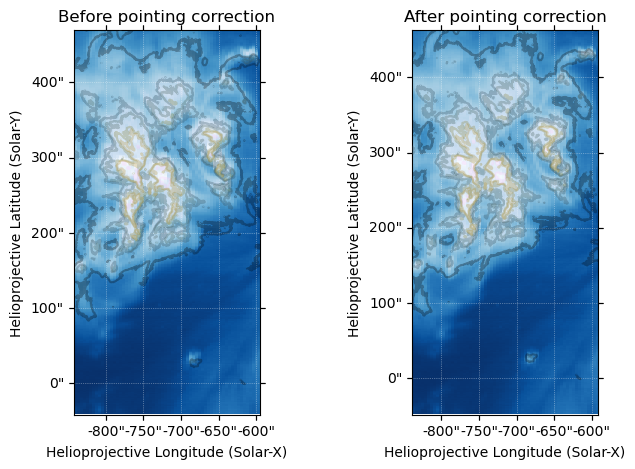

In [23]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(121,projection=eis_193_intmap)
eis_193_intmap.plot(axes=ax1, title='Before pointing correction')

ax2 = fig.add_subplot(122,projection=eis_193_intmap_shift)
eis_193_intmap_shift.plot(axes=ax2, title='After pointing correction')

aia_levels = [200, 400, 500, 700, 800, 1200] * aia_193_map_eis.unit

for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    aia_193_map_eis.draw_contours(aia_levels, axes=ax_, cmap=cmcm.batlowK, alpha=0.3)
    ax_.axis(bounds)

In [19]:
def repro_aia_hri(aia_map,hri_map,algorithm="exact"):
    # out_frame = Helioprojective(observer='earth', obstime=hri_map.date,
    #                     rsun=aia_map.coordinate_frame.rsun)
    # out_center = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=out_frame)
    # header = sunpy.map.make_fitswcs_header(aia_map.data.shape,
    #                                     out_center,
    #                                     scale=u.Quantity(aia_map.scale))
    # out_wcs = WCS(header)

    # with propagate_with_solar_surface():
    #     aia_map_hri_time = aia_map.reproject_to(out_wcs,algorithm=algorithm)

    # aia_map_repro = aia_map_hri_time.reproject_to(hri_map.wcs,algorithm="exact")

    aia_map_repro = aia_map.reproject_to(hri_map.wcs,algorithm=algorithm)

    return aia_map_repro


In [20]:
aia_193_map_repro = repro_aia_hri(aia_193_map,hri_174_map)

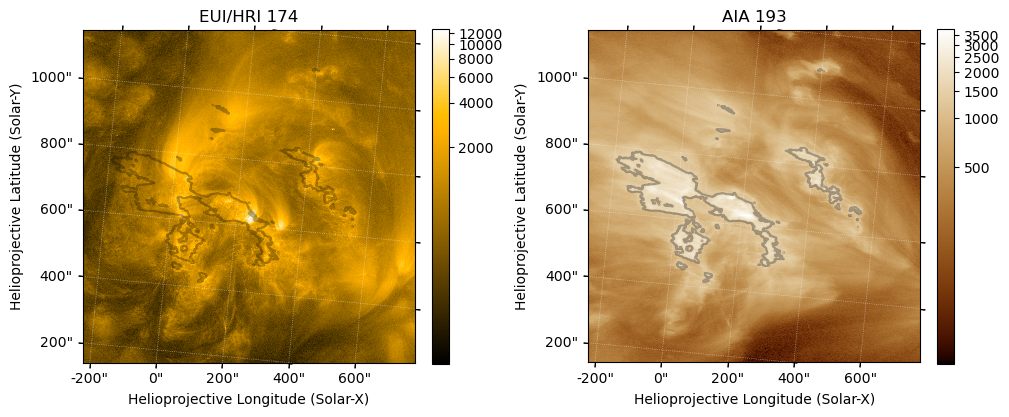

In [21]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=hri_174_map)
hri_174_map.plot(axes=ax1, title='hri/HRI 174')
plt.colorbar(ax=ax1,shrink=0.75)


ax2 = fig.add_subplot(122,projection=hri_174_map)
aia_193_map_repro.plot(axes=ax2, title='AIA 193')
plt.colorbar(ax=ax2,shrink=0.75)

aia_193_levels = [1500]
for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    aia_193_map_repro.draw_contours(aia_193_levels, axes=ax_, cmap=cmcm.batlowK, alpha=0.3)
    ax_.axis(bounds)

In [22]:
aia_171_map_repro = repro_aia_hri(aia_171_map,hri_174_map)

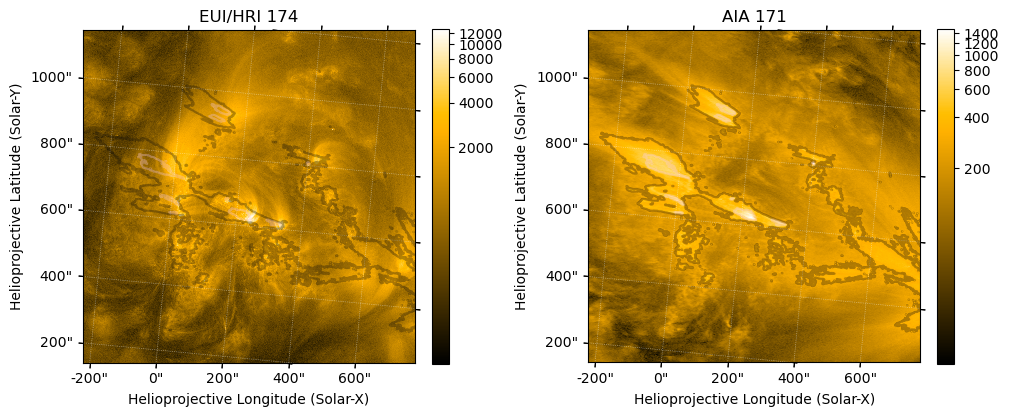

In [23]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=hri_174_map)
hri_174_map.plot(axes=ax1, title='hri/HRI 174')
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=hri_174_map)
aia_171_map_repro.plot(axes=ax2, title='AIA 171',autoalign=True)
plt.colorbar(ax=ax2,shrink=0.75)

aia_171_levels = [300,600]
for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    aia_171_map_repro.draw_contours(aia_171_levels, axes=ax_, cmap=cmcm.batlowK, alpha=0.3)
    ax_.axis(bounds)

In [24]:
aia_304_map_repro = repro_aia_hri(aia_304_map,hri_174_map)

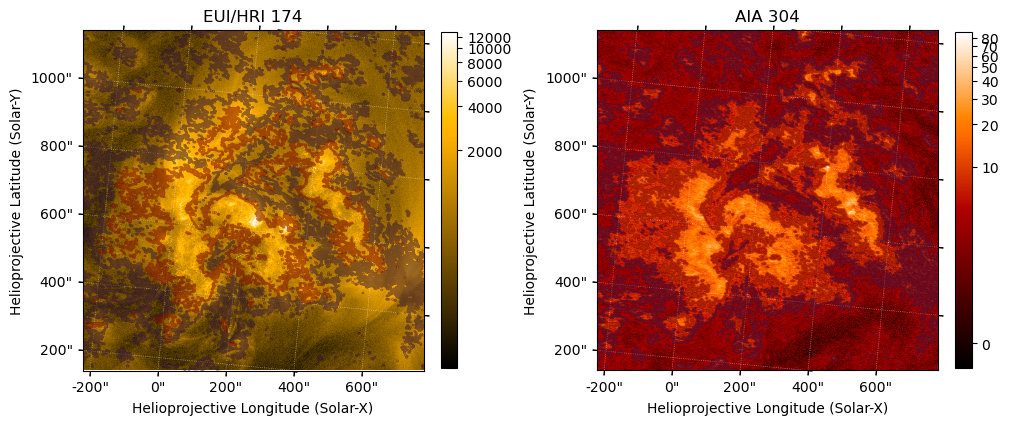

In [25]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=hri_174_map)
hri_174_map.plot(axes=ax1, title='hri/HRI 174')
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=hri_174_map)
aia_304_map_repro.plot(axes=ax2, title='AIA 304',autoalign=True)
plt.colorbar(ax=ax2,shrink=0.75)

aia_304_levels = [5,10]
for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    aia_304_map_repro.draw_contours(aia_304_levels, axes=ax_, cmap="turbo", alpha=0.5)
    ax_.axis(bounds)

In [26]:
aia_1600_map_repro = repro_aia_hri(aia_1600_map,hri_174_map)

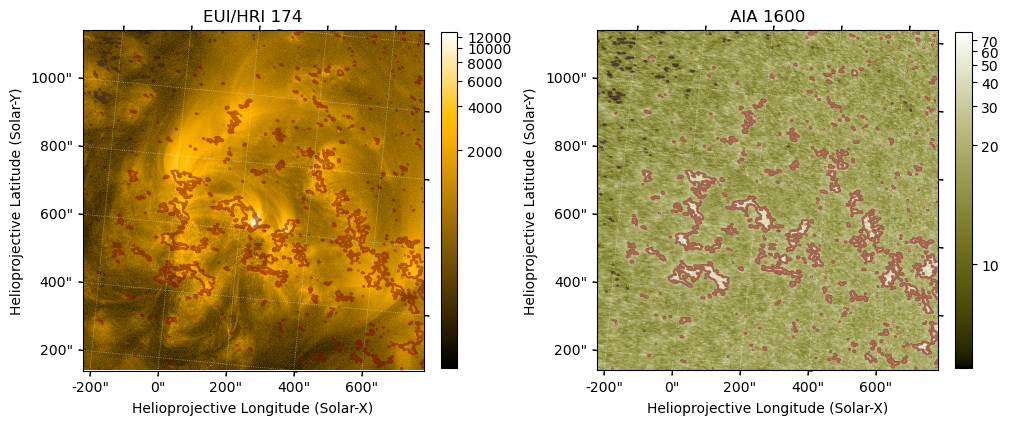

In [27]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=hri_174_map)
hri_174_map.plot(axes=ax1, title='hri/HRI 174')
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=hri_174_map)
aia_1600_map_repro.plot(axes=ax2, title='AIA 1600',autoalign=True)
plt.colorbar(ax=ax2,shrink=0.75)

aia_1600_levels = [10,30]
for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    aia_1600_map_repro.draw_contours(aia_1600_levels, axes=ax_, cmap="turbo", alpha=0.5)
    ax_.axis(bounds)

In [28]:
hmi_los_map_repro = repro_aia_hri(hmi_los_map_to_aia,hri_174_map)

In [29]:
phi_los_map_repro = phi_los_map.reproject_to(hri_174_map.wcs)

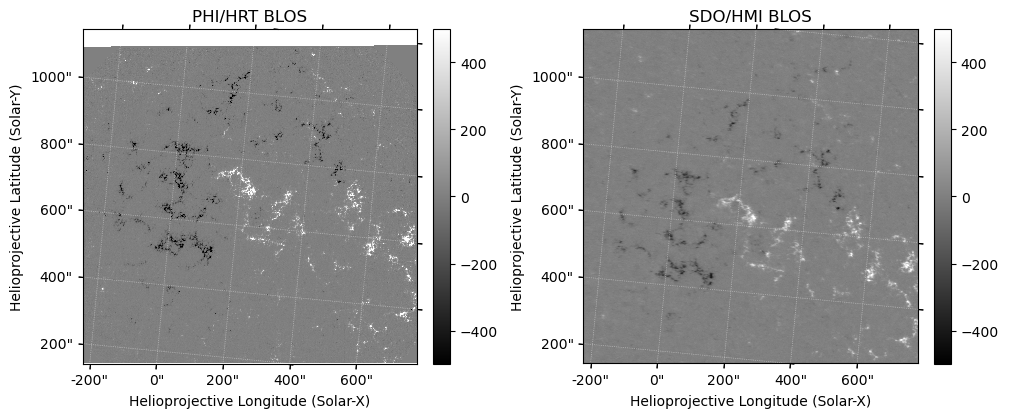

In [30]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=phi_los_map_repro)
phi_los_map_repro.plot(axes=ax1, title='PHI/HRT BLOS',norm=plt.Normalize(-500, 500))
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=phi_los_map_repro)
hmi_los_map_repro.plot(axes=ax2, title='SDO/HMI BLOS',norm=plt.Normalize(-500, 500),autoalign=True)
plt.colorbar(ax=ax2,shrink=0.75)

In [42]:
phi_los_map_repro_crop = phi_los_map_repro.submap(SkyCoord(0*u.arcsec,400*u.arcsec,frame=phi_los_map_repro.coordinate_frame),
                                        top_right=SkyCoord(600*u.arcsec,1000*u.arcsec,frame=phi_los_map_repro.coordinate_frame))

hmi_los_map_repro_crop = hmi_los_map_repro.submap(SkyCoord(0*u.arcsec,400*u.arcsec,frame=hmi_los_map_repro.coordinate_frame),
                                        top_right=SkyCoord(600*u.arcsec,1000*u.arcsec,frame=hmi_los_map_repro.coordinate_frame))

In [47]:
yshift_phi, xshift_phi = coalignment._calculate_shift(hmi_los_map_repro.data,phi_los_map_repro_crop.data)

In [53]:
reference_coord_phi = hmi_los_map_repro.pixel_to_world(xshift_phi, yshift_phi)
Txshift_phi = reference_coord_phi.Tx - phi_los_map_repro_crop.bottom_left_coord.Tx
Tyshift_phi = reference_coord_phi.Ty - phi_los_map_repro_crop.bottom_left_coord.Ty
print(Txshift_phi)
print(Tyshift_phi)
phi_los_map_repro_crop_shift = phi_los_map_repro_crop.shift_reference_coord(Txshift_phi,Tyshift_phi)
phi_los_map_repro_shift = phi_los_map_repro.shift_reference_coord(Txshift_phi,Tyshift_phi)
phi_los_map_repro_shift_repro = repro_aia_hri(phi_los_map_repro_shift,hri_174_map)

6.20511 arcsec
-77.4193 arcsec


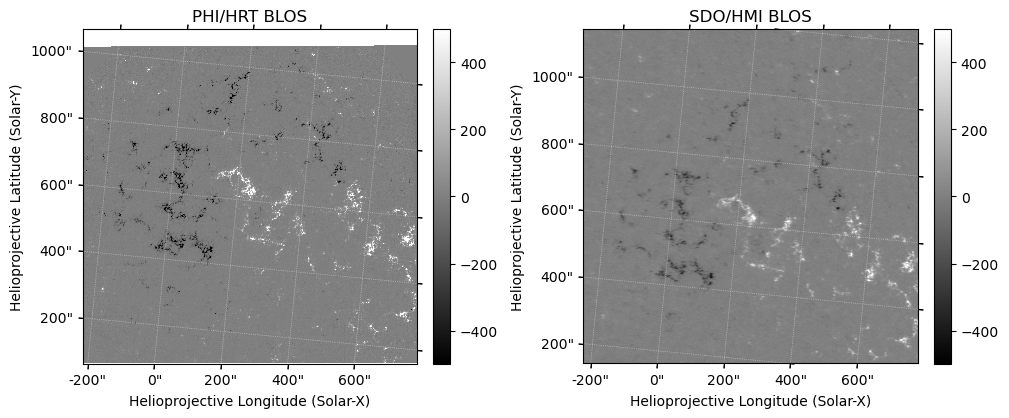

In [52]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=phi_los_map_repro_shift)
phi_los_map_repro_shift.plot(axes=ax1, title='PHI/HRT BLOS',norm=plt.Normalize(-500, 500))
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=phi_los_map_repro)
hmi_los_map_repro.plot(axes=ax2, title='SDO/HMI BLOS',norm=plt.Normalize(-500, 500),autoalign=True)
plt.colorbar(ax=ax2,shrink=0.75)

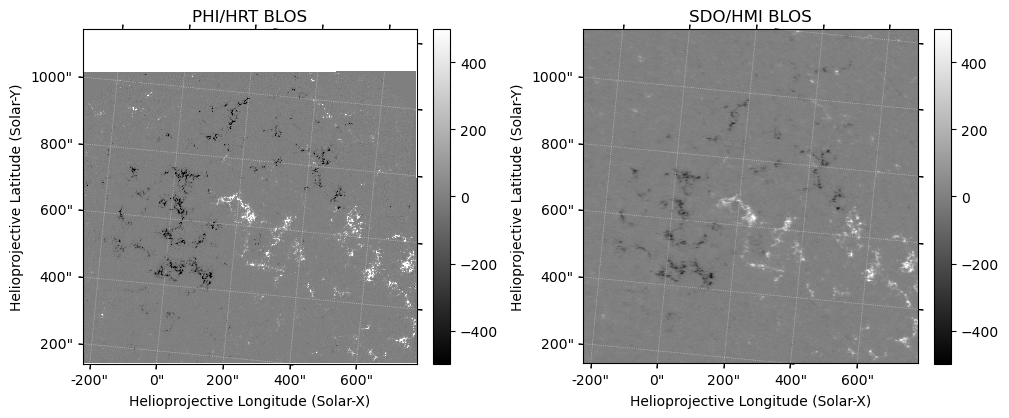

In [54]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=phi_los_map_repro_shift_repro)
phi_los_map_repro_shift_repro.plot(axes=ax1, title='PHI/HRT BLOS',norm=plt.Normalize(-500, 500))
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=phi_los_map_repro)
hmi_los_map_repro.plot(axes=ax2, title='SDO/HMI BLOS',norm=plt.Normalize(-500, 500),autoalign=True)
plt.colorbar(ax=ax2,shrink=0.75)

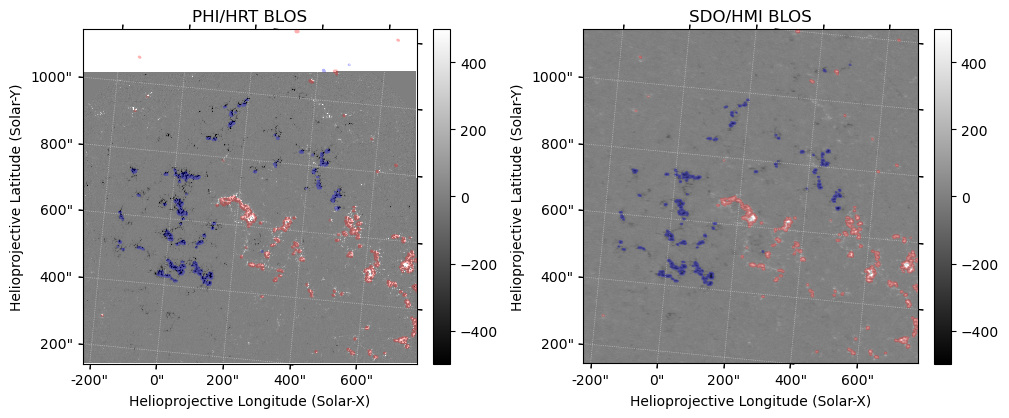

In [74]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=phi_los_map_repro_shift_repro)
phi_los_map_repro_shift_repro.plot(axes=ax1, title='PHI/HRT BLOS',norm=plt.Normalize(-500, 500))
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=hmi_los_map_repro)
hmi_los_map_repro.plot(axes=ax2, title='SDO/HMI BLOS',norm=plt.Normalize(-500, 500),autoalign=True)
plt.colorbar(ax=ax2,shrink=0.75)

hmi_los_levels = [-150,150]

for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    hmi_los_map_repro.draw_contours(hmi_los_levels,axes=ax_, colors=["b","r"], alpha=0.3,zorder=10)
    ax_.axis(bounds)